<a href="https://colab.research.google.com/github/vinihsouza/ArticleColab/blob/main/Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição de geração de energia eletrica fotovoltaica utilizando Rede Neural Artificial

## Aluno:

<img src="https://media.licdn.com/dms/image/C4D03AQFAQSy10zHYkw/profile-displayphoto-shrink_800_800/0/1562072133437?e=1693440000&v=beta&t=dSj6m3_ijeNzUBFJNZh673HbUI4Poz-duH8xZthztNc" width="150" style="float: left; margin-right: 5px;" border="1px"/>

  __Vinícius Fernando de Souza__ <br>
  Institute of Science and Technology of Sorocaba (ICTS) <br>
  São Paulo State University (Unesp) <br>
  www.linkedin.com/in/eng-viniciussouza <br>
  vinicius.fernando@unesp.br <br>

<br/>


# Tabela de conteúdo

<div> Abstract <br>
<br>
1. Introdução <br>
 <br>
2. Objetivo<br>
    2.1. Objetivo Geral <br>
    2.2. Objetivo especificos <br>
    <br>
3. Métodos <br>
    3.1. Dados <br>
    3.2. Abordagem<br>
    3.2. Técnicas<br>
    <br>
4. Resultados <br>
    <br>
5. Conclusão <br>
    <br>
6. Referências <br>


# Abstract
A geração de energia fotovoltaica é altamente dependente de fatores climáticos, como radiação solar, temperatura, umidade e velocidade do vento. Esses fatores podem variar consideravelmente ao longo do dia, da estação ou mesmo de uma regiao para outra. Portanto, a capacidade de prever com precisão a geração de energia em um determinado momento é de extrema importância para garantir um suprimento estável e eficiente de eletricidade. A previsão confiável da geração de energia elétrica fotovoltaica é desejável para os operadores do sistema elétrico, contudo existe uma grande gama de variáveis climáticas que devem ser consideradas para tal feito. O foco deste trabalho está na predição da potência gerada por um sistema fotovoltaico utilizando uma das técnicas de aprendizado de máquina supervisionado, sendo ela a rede neural artificial. Para tal feito, foi utilizado um conjunto de dados históricos relacionando dados de gerações de
energia fotovoltaica e ambientais fornecidos pela UNISOLAR [1], com dados de geração de um sistema fotovoltaico situado em Bundoora, Australia. Os resultados obtidos demonstram o potencial do uso de aprendizado de máquina para a aplicação considerada.

# 1. Introdução


# 2. Rede Neural Artificial

# 3. Métodos


Foram utilizados 4 conjutos de dados disponibilizados pela UNISOLAR[1], disponível em: https://github.com/CDAC-lab/UNISOLAR. Sendo eles:<br>
Solar_Generation_sub - Subset de dados com geração de energia em 2021. <br>
Weather_data_sub - Subset de dados com informações de meteorologicas como: temperatura aparente, temperatura do ar, temperatura de ponto de orvalho, umidade relativa, velocidade e direção do vento em 2021. <br>
Solar_Irradiance - Subset de dados com informações de opacidade das nuvens e irradiância global horizontal (GHI) em 2021.<br>
Solar_Site_Details - Subset de dados com informações de Número de paineis, Painel, Inversor, Otimizador, Métricas, latitude e longitude.<br>

Para realizar as implementações deste trabalho, foi utilizado as seguintes bibliotecas:<br>
• matplotlib: Biblioteca de plotagem <br>
• scikit-learn: para aprendizado de máquina em python <br>
• numpy: Pacote para computação numérica em python <br>
• pandas: Pacote para análise de dados em python <br>
• TensorFlow Keras: para a calibração do modelo neural baseado no conjunto de dados <br>

Os 4 subsets foram compilados em um, formando um dataset completo de informações, resultado pode ser visto no código abaixo:

In [179]:
#importar bibliotecas
import pandas as pd
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive/', force_remount=True)

# Caminhos dos arquivos CSV
solar_generation_path = '/content/drive/My Drive/Colab Notebooks/SML/Article Dataset/Solar_Generation_sub.csv'
solar_irradiance_path = '/content/drive/My Drive/Colab Notebooks/SML/Article Dataset/Solar_Irradiance.csv'
solar_site_details_path = '/content/drive/My Drive/Colab Notebooks/SML/Article Dataset/Solar_Site_Details.csv'
weather_data_path = '/content/drive/My Drive/Colab Notebooks/SML/Article Dataset/Weather_data_sub.csv'

# Carregar os datasets como DataFrames
solar_generation = pd.read_csv(solar_generation_path)
weather_data = pd.read_csv(weather_data_path)
solar_irradiance = pd.read_csv(solar_irradiance_path)
solar_irradiance_Bundoora = solar_irradiance[solar_irradiance['Campus'] == 'Bundoora']
solar_site_details = pd.read_csv(solar_site_details_path)
solar_site_details_25 = solar_site_details[solar_site_details['SiteKey'] == 25]

# Unir os datasets com base nas colunas em comum
merged_data = pd.merge(weather_data, solar_generation, left_on=['CampusKey', 'Timestamp'], right_on=['CampusKey', 'Timestamp'], how='outer')
merged_data = pd.merge(merged_data, solar_irradiance_Bundoora, left_on='Timestamp', right_on='Timestamp_UTC', how='outer')
merged_data = pd.merge(merged_data, solar_site_details_25, on='SiteKey', how='outer')

# Salvar o novo dataset em um arquivo CSV
merged_data.to_csv('/content/drive/My Drive/Colab Notebooks/SML/Article Dataset/merged_dataset.csv', index=False)

merged_data.describe()

Mounted at /content/drive/


,CampusKey_x,ApparentTemperature,AirTemperature,DewPointTemperature,RelativeHumidity,WindSpeed,WindDirection,SiteKey,SolarGeneration,CloudOpacity,Ghi,CampusKey_y,kWp,Number of panels,lat,Lon
count,35040.0,26209.000000,26209.000000,26209.000000,26209.000000,17291.000000,17291.000000,34256.0,15955.000000,20472.000000,20472.000000,34256.0,3.425600e+04,34256.0,34256.000000,34256.000000
mean,1.0,13.117569,14.819666,9.751547,75.479532,9.609418,201.485078,25.0,27.792512,28.450562,179.151426,1.0,3.841200e+02,1164.0,-37.718287,145.050975
std,0.0,6.174269,5.785940,3.706719,21.152302,7.552169,84.603665,0.0,22.845889,28.260132,264.808584,0.0,5.684425e-14,0.0,0.000000,0.000000
min,1.0,-3.993333,-0.300000,-0.300000,13.000000,0.000000,0.000000,25.0,0.125000,0.000000,0.000000,1.0,3.841200e+02,1164.0,-37.718287,145.050975
25%,1.0,8.846667,10.966667,7.066667,59.133333,4.080000,155.333333,25.0,7.750000,0.000000,0.000000,1.0,3.841200e+02,1164.0,-37.718287,145.050975
50%,1.0,12.200000,14.100000,9.566667,76.400000,8.866667,210.333333,25.0,21.843750,22.000000,10.000000,1.0,3.841200e+02,1164.0,-37.718287,145.050975
75%,1.0,16.613333,17.800000,12.180000,99.000000,13.480000,259.000000,25.0,44.593750,50.600000,291.000000,1.0,3.841200e+02,1164.0,-37.718287,145.050975
max,1.0,36.226667,40.133333,20.720000,100.000000,56.400000,358.066667,25.0,80.250000,96.800000,1096.000000,1.0,3.841200e+02,1164.0,-37.718287,145.050975


Posteriormente, foi realizado um pré-processamento dos dados, removendo colunas não numéricas e linhas com valores ausentes. Então foi realizada a normalização dos valores.

In [188]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SML/Article Dataset/merged_dataset.csv')

# Converter a coluna "Timestamp" para datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extrair características relevantes da coluna "Timestamp"
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

# Remover colunas não numéricas e colunas desnecessárias
columns_to_drop = ['Timestamp', 'CampusKey_x', 'SiteKey', 'Panel', 'Inverter', 'Timestamp_UTC', 'Campus', 'Optimizers', 'Metric']
df_numeric = df.drop(columns_to_drop, axis=1)

# Remover linhas com valores ausentes
df_numeric.dropna(inplace=True)

# Normalizar os dados
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric.drop(['SolarGeneration'], axis=1))

Então os conjutos de dados foram separados em X e y, para fazer a separação de dados de treinamento e de teste

In [189]:
# Separar features e target
X = df_scaled
y = df_numeric['SolarGeneration'].values

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Foi criada a rede neural artificial, com 4 camadas, sendo uma de entrada, duas camadas ocultas e uma de saída.

In [185]:
# Construir o modelo de ANN
model = Sequential()

#Camada de entrada
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))

#Regularização 20%
model.add(Dropout(0.2))

#camadas ocultas
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

#camada de saída
model.add(Dense(1))

# Compilar o modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Treinar o modelo
model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=1)


Epoch 1/300
49/49 [==============================] - 1s 1ms/step - loss: 1061.5736
Epoch 2/300
49/49 [==============================] - 0s 1ms/step - loss: 528.3723
Epoch 3/300
49/49 [==============================] - 0s 1ms/step - loss: 467.2021
Epoch 4/300
49/49 [==============================] - 0s 1ms/step - loss: 417.9214
Epoch 5/300
49/49 [==============================] - 0s 1ms/step - loss: 377.3301
Epoch 6/300
49/49 [==============================] - 0s 2ms/step - loss: 345.7394
Epoch 7/300
49/49 [==============================] - 0s 2ms/step - loss: 323.3405
Epoch 8/300
49/49 [==============================] - 0s 2ms/step - loss: 302.5852
Epoch 9/300
49/49 [==============================] - 0s 1ms/step - loss: 291.6075
Epoch 10/300
49/49 [==============================] - 0s 2ms/step - loss: 279.5737
Epoch 11/300
49/49 [==============================] - 0s 1ms/step - loss: 276.6517
Epoch 12/300
49/49 [==============================] - 0s 1ms/step - loss: 265.4533
Epoch 13/300

# 4. Resultados

Com o modelo treinado, podemos avaliar seu resultado com as informações de MAE, MSE e R², além do comparativo entre predição e geração, resultados abaixo:

13/13 [==============================] - 0s 1ms/step
Mean Absolute Error (MAE): 8.270685546661353
Mean Squared Error(MSE): 138.52310180664062
R-squared: 0.740569131350951


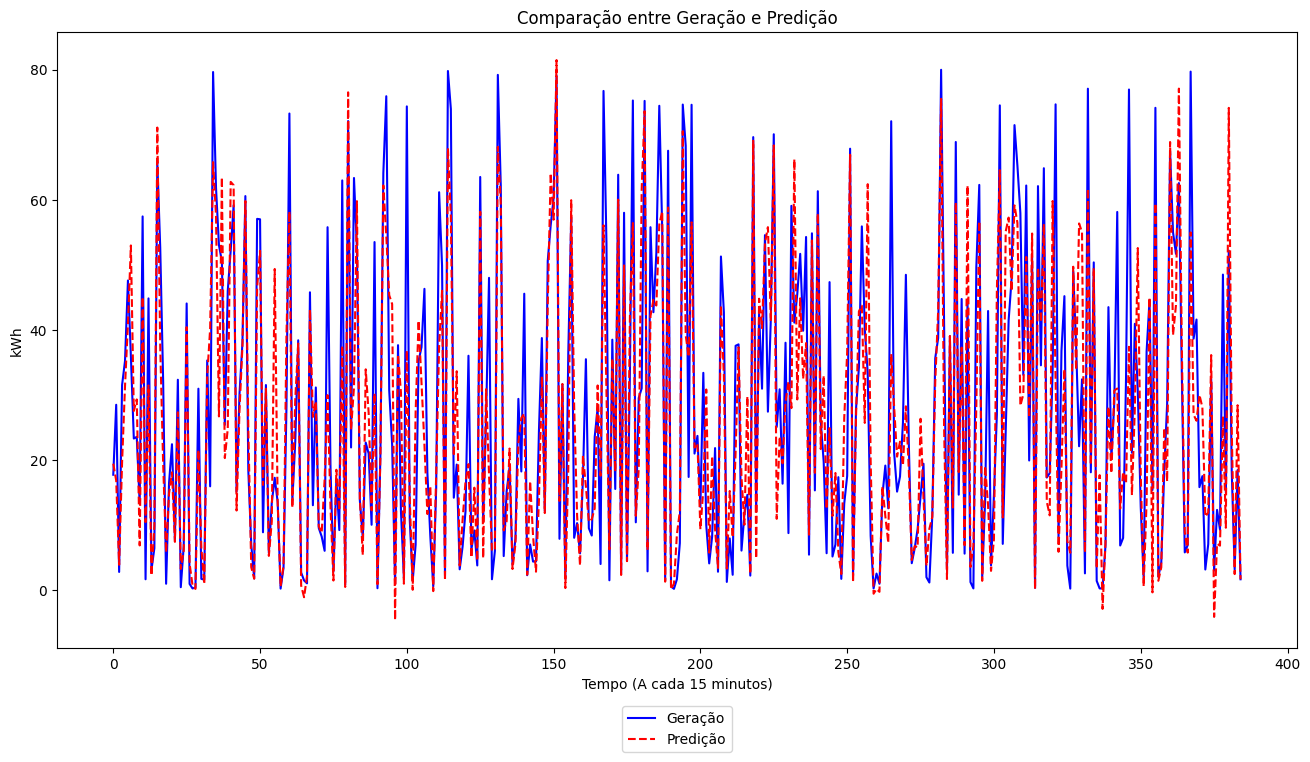

In [191]:
# Avaliar o modelo
loss = model.evaluate(X_test, y_test, verbose=0)

# Previsões do modelo
predictions = model.predict(X_test)

# Cálculo do MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Cálculo do MSE
print(f'Mean Squared Error(MSE): {loss}')

# Cálculo do R²
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

# Fazer previsões
predictions = np.squeeze(predictions)
indices = range(len(y_test))

#Configurar plot no gráfico
plt.figure(figsize=(16, 8))
plt.plot(indices, y_test, 'b-', label='Geração')
plt.plot(indices, predictions, 'r--', label='Predição')
plt.xlabel('Tempo (A cada 15 minutos)')
plt.ylabel('kWh')
plt.title('Comparação entre Geração e Predição')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.18))
plt.show()


# 5. Referências

[1] S. Wimalaratne, D. Haputhanthri, S. Kahawala, G. Gamage, D. Alahakoon and A. Jennings, "UNISOLAR: An Open Dataset of Photovoltaic Solar Energy Generation in a Large Multi-Campus University Setting," 2022 15th International Conference on Human System Interaction (HSI), Melbourne, Australia, 2022, pp. 1-5, doi: 10.1109/HSI55341.2022.9869474. <br>
[2] D. Su, E. Batzelis and B. Pal, "Machine Learning Algorithms in Forecasting of Photovoltaic Power Generation," 2019 International Conference on Smart Energy Systems and Technologies (SEST), Porto, Portugal, 2019, pp. 1-6, doi: 10.1109/SEST.2019.8849106. <br>
[3] D. Mukherjee, S. Chakraborty, P. K. Guchhait and J. Bhunia, "Machine Learning based Solar Power Generation Forecasting with and without MPPT Controller," 2020 IEEE 1st International Conference for Convergence in Engineering (ICCE), Kolkata, India, 2020, pp. 44-48, doi: 10.1109/ICCE50343.2020.9290685. <br>
[4] S. Sarp, M. Kuzlu, U. Cali, O. Elma and O. Guler, "An Interpretable Solar Photovoltaic Power Generation Forecasting Approach Using An Explainable Artificial Intelligence Tool," 2021 IEEE Power & Energy Society Innovative Smart Grid Technologies Conference (ISGT), Washington, DC, USA, 2021, pp. 1-5, doi: 10.1109/ISGT49243.2021.9372263. <br>
[5] C. K. Rao, S. K. Sahoo and F. F. Yanine, "Forecasting Electric Power Generation in a Photovoltaic Power Systems for Smart Energy Management," 2022 International Conference on Intelligent Controller and Computing for Smart Power (ICICCSP), Hyderabad, India, 2022, pp. 1-6, doi: 10.1109/ICICCSP53532.2022.9862396. <br>
[6]  S. D. Al-Majidi, M. F. Abbod and H. S. Al-Raweshidy, "Design of an intelligent MPPT based on ANN using a real photovoltaic system data," 2019 54th International Universities Power Engineering Conference (UPEC), Bucharest, Romania, 2019, pp. 1-6, doi: 10.1109/UPEC.2019.8893638.<br>
[7] M. A. Khafagy, S. O. Abdellatif, R. A. Swief and H. A. Ghali, "Optimizing The Performance Of Photovoltaic Systems Under Non-uniform Irradiance Using ANN-MPPT Algorithm," 2023 IEEE Conference on Power Electronics and Renewable Energy (CPERE), Luxor, Egypt, 2023, pp. 1-5, doi: 10.1109/CPERE56564.2023.10119640.<br>
[8] M. J. Ch and P. S. Bharathi, "Enhancing Optimization of Photovoltaic Devices Performance using Artificial Neural Network (ANN) Comparing with Thermoelectric Generators (TEGs) to Improve Power Efficiency," 2023 Eighth International Conference on Science Technology Engineering and Mathematics (ICONSTEM), Chennai, India, 2023, pp. 1-6, doi: 10.1109/ICONSTEM56934.2023.10142647. <br>
[9] S. Sehn, "Predição de Geração Fotovoltaica Usando Aprendizado Profundo," 2021 Trabalho de conclusão de curso, Florianópolis, Brasil, 2021  Universidade Federal de Santa Catarina, departamento de engenharia elétrica e eletrônica.<br>
